#### Exercise 6

Import, plot and analyse the time series of Italian covid cases.

Try to plot at normal and log scales the new cases, hospitalised and deaths. What can you say?

Find the lag of maximum correlation between the series of new cases and deaths to determine how delayed is one curve with respect to the other.

Taking a forecast window of 3 weeks, try to forecast the new cases tomorrow. Think of what metric is the most suitable to use.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from statsmodels.tsa.arima.model import ARIMA


from utils.helpers import regression_results, rmse, parser

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 10.0)
sns.set()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
url_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

In [ ]:
df = pd.read_csv(url_data,
                 parse_dates=True,
                 index_col='data'
                 )

In [ ]:
df.head()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


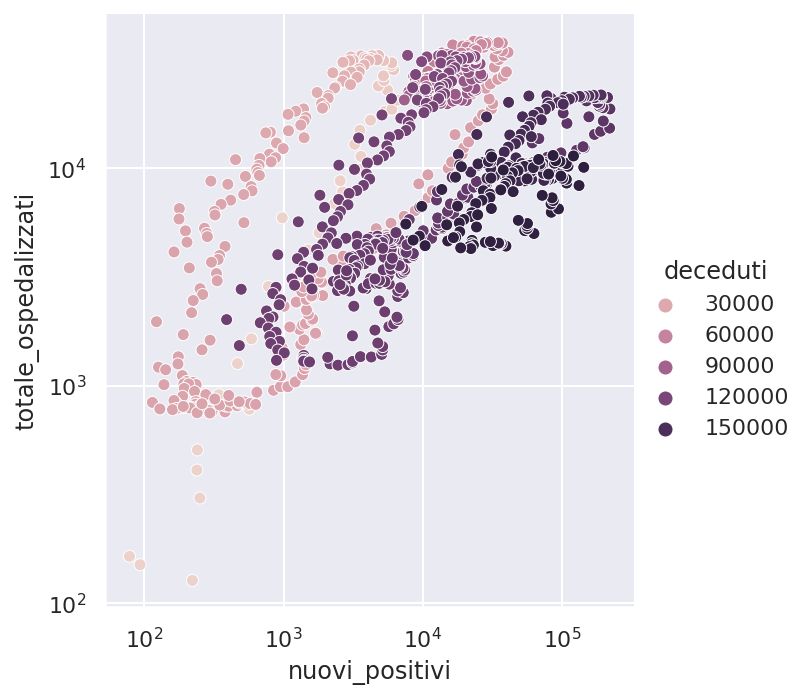

In [ ]:
g = sns.relplot(x='nuovi_positivi', y="totale_ospedalizzati", hue='deceduti', data=df)
g.set(xscale="log")
g.set(yscale="log")
plt.show()

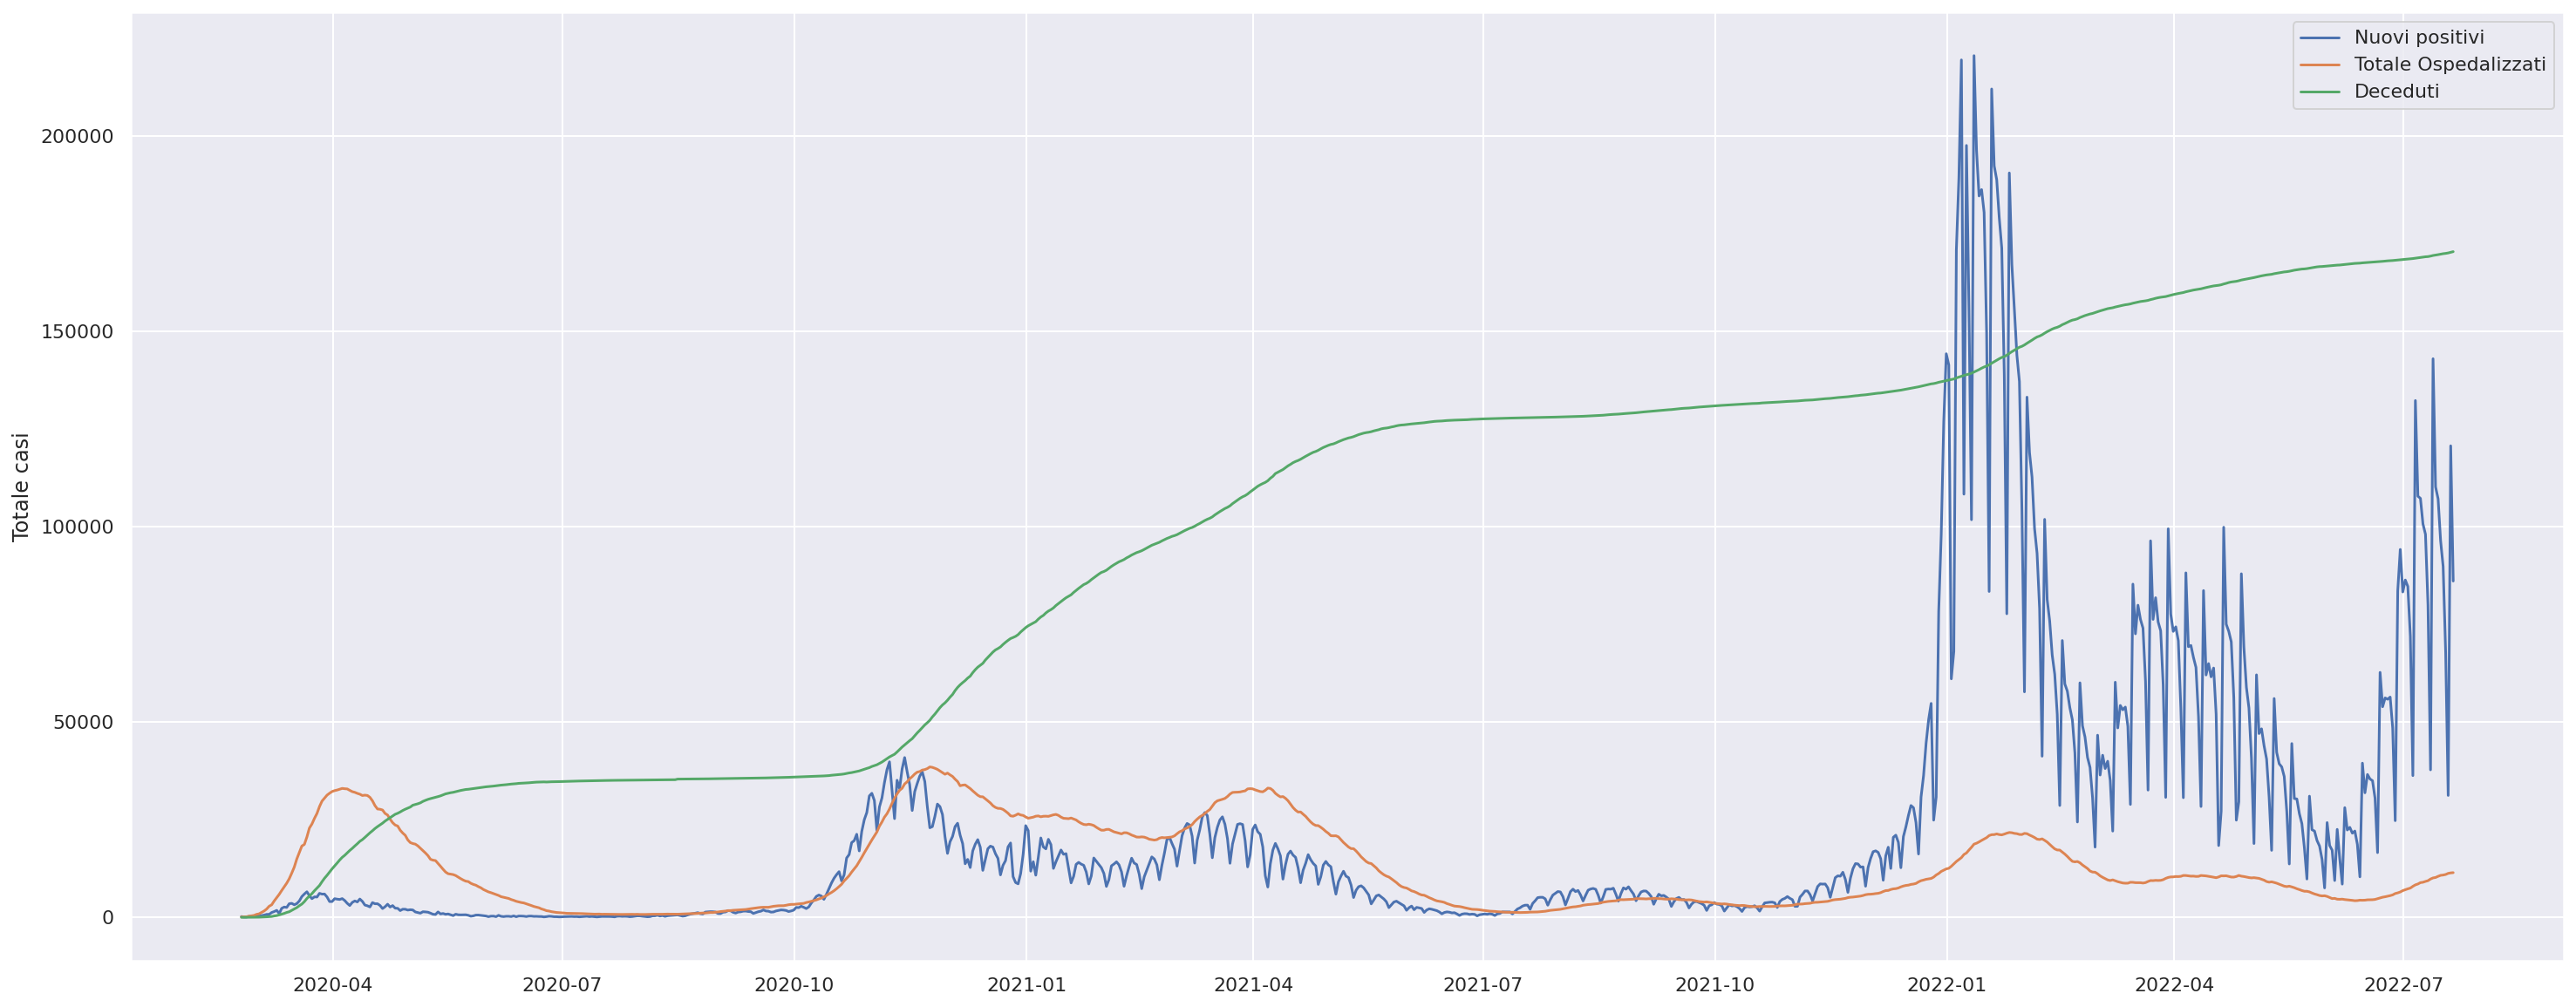

In [ ]:
plt.plot(df['nuovi_positivi'],
         label='Nuovi positivi')
plt.plot(df['totale_ospedalizzati'],
         label='Totale Ospedalizzati')
plt.plot(df['deceduti'],
         label='Deceduti')      
             
plt.ylabel('Totale casi')
plt.legend();

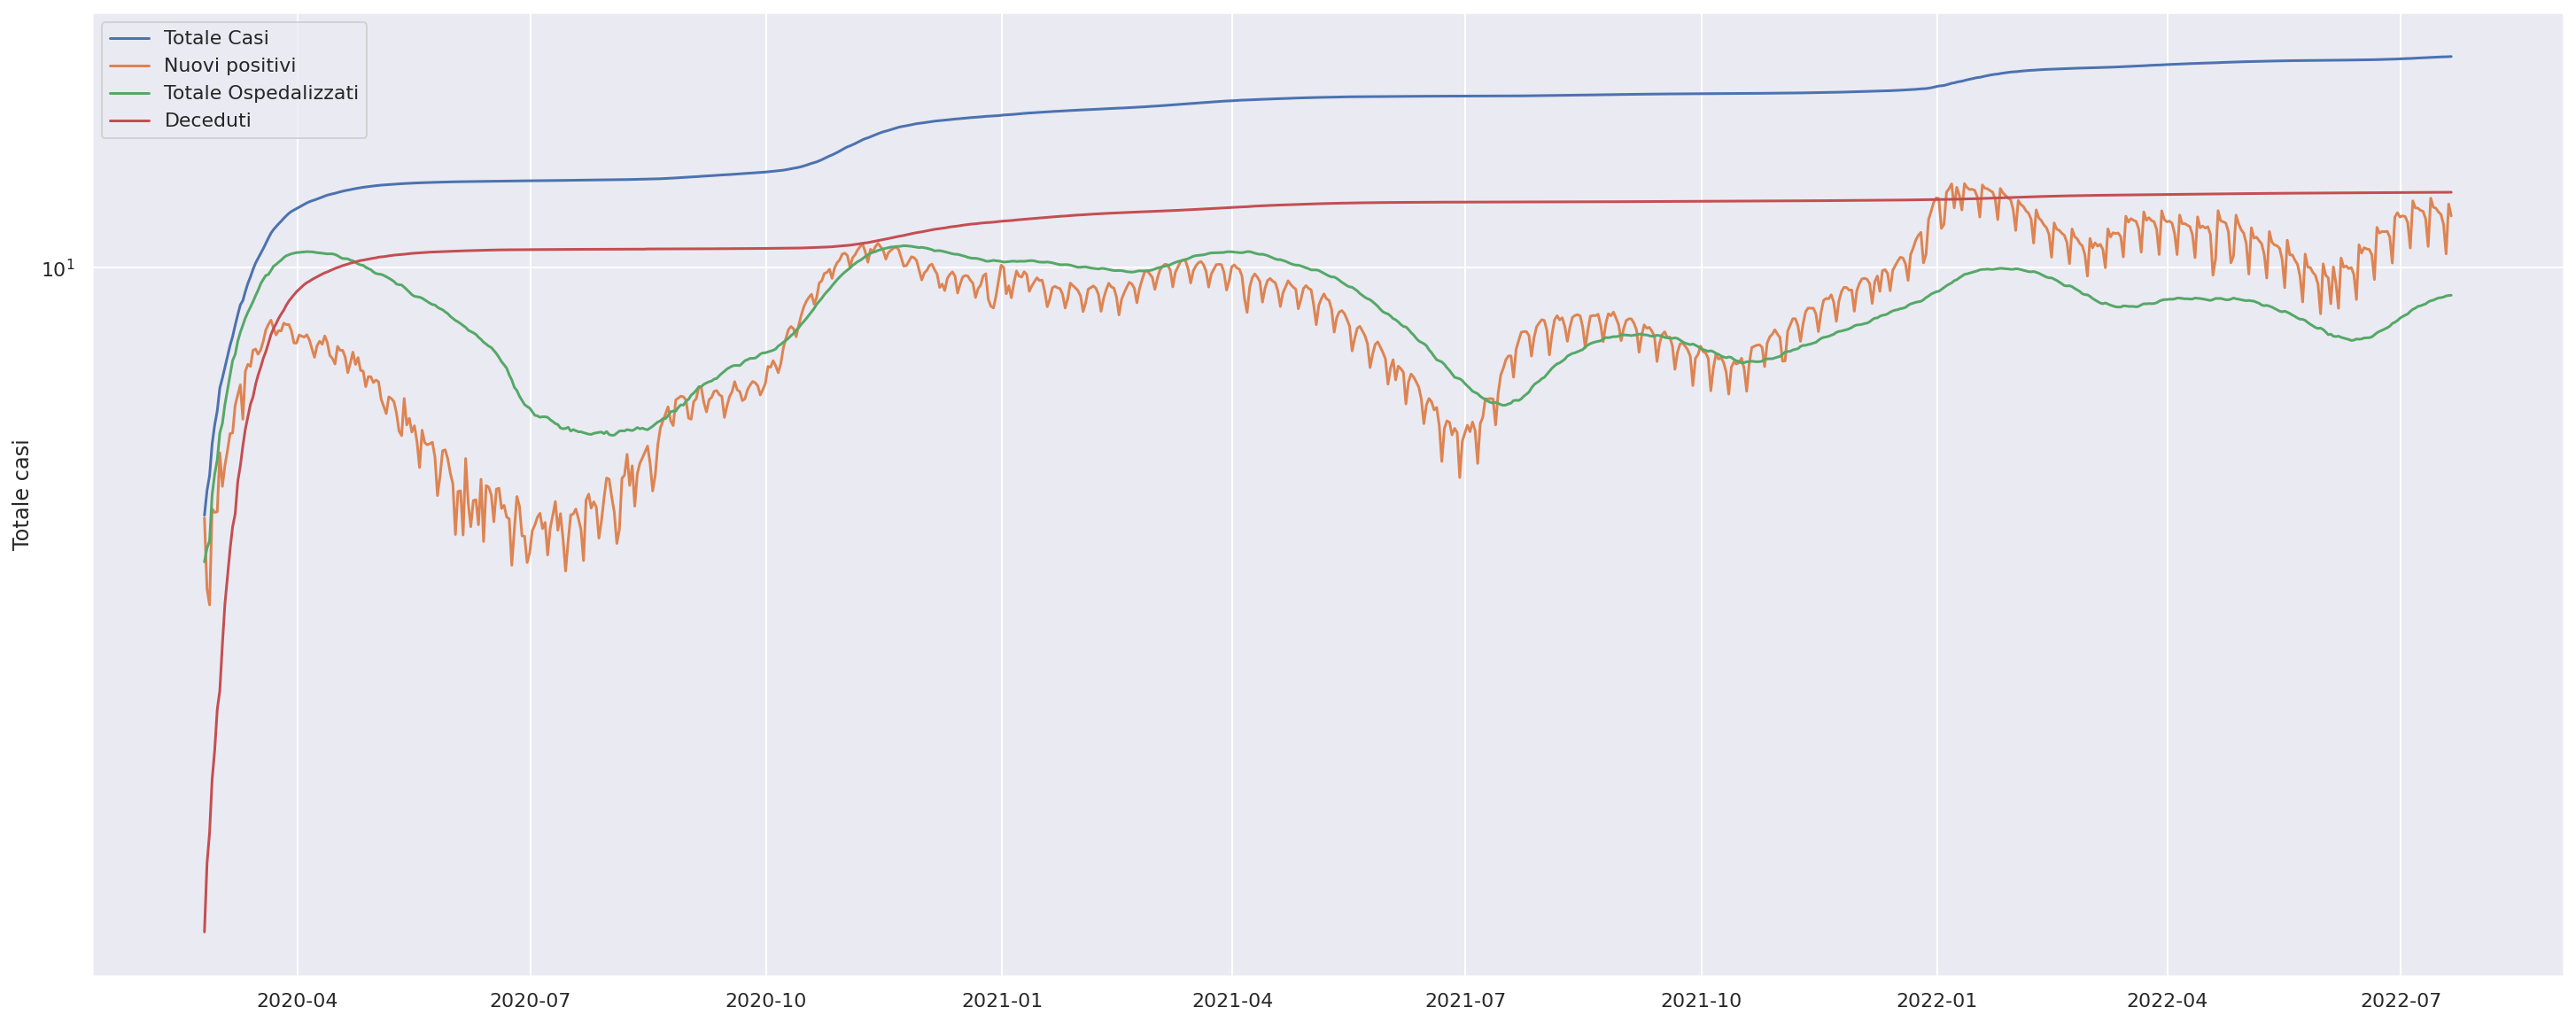

In [ ]:

logtot = np.log(df['totale_casi'])
plt.plot(logtot,label='Totale Casi')

logarithm = np.log(df['nuovi_positivi'])
plt.plot(logarithm,label='Nuovi positivi')

logospedalizzati = np.log(df['totale_ospedalizzati'])
plt.plot(logospedalizzati,label='Totale Ospedalizzati')

logdeceduti = np.log(df['deceduti'])
plt.plot(logdeceduti,label='Deceduti')

plt.yscale('log')      
plt.ylabel('Totale casi')
plt.legend();

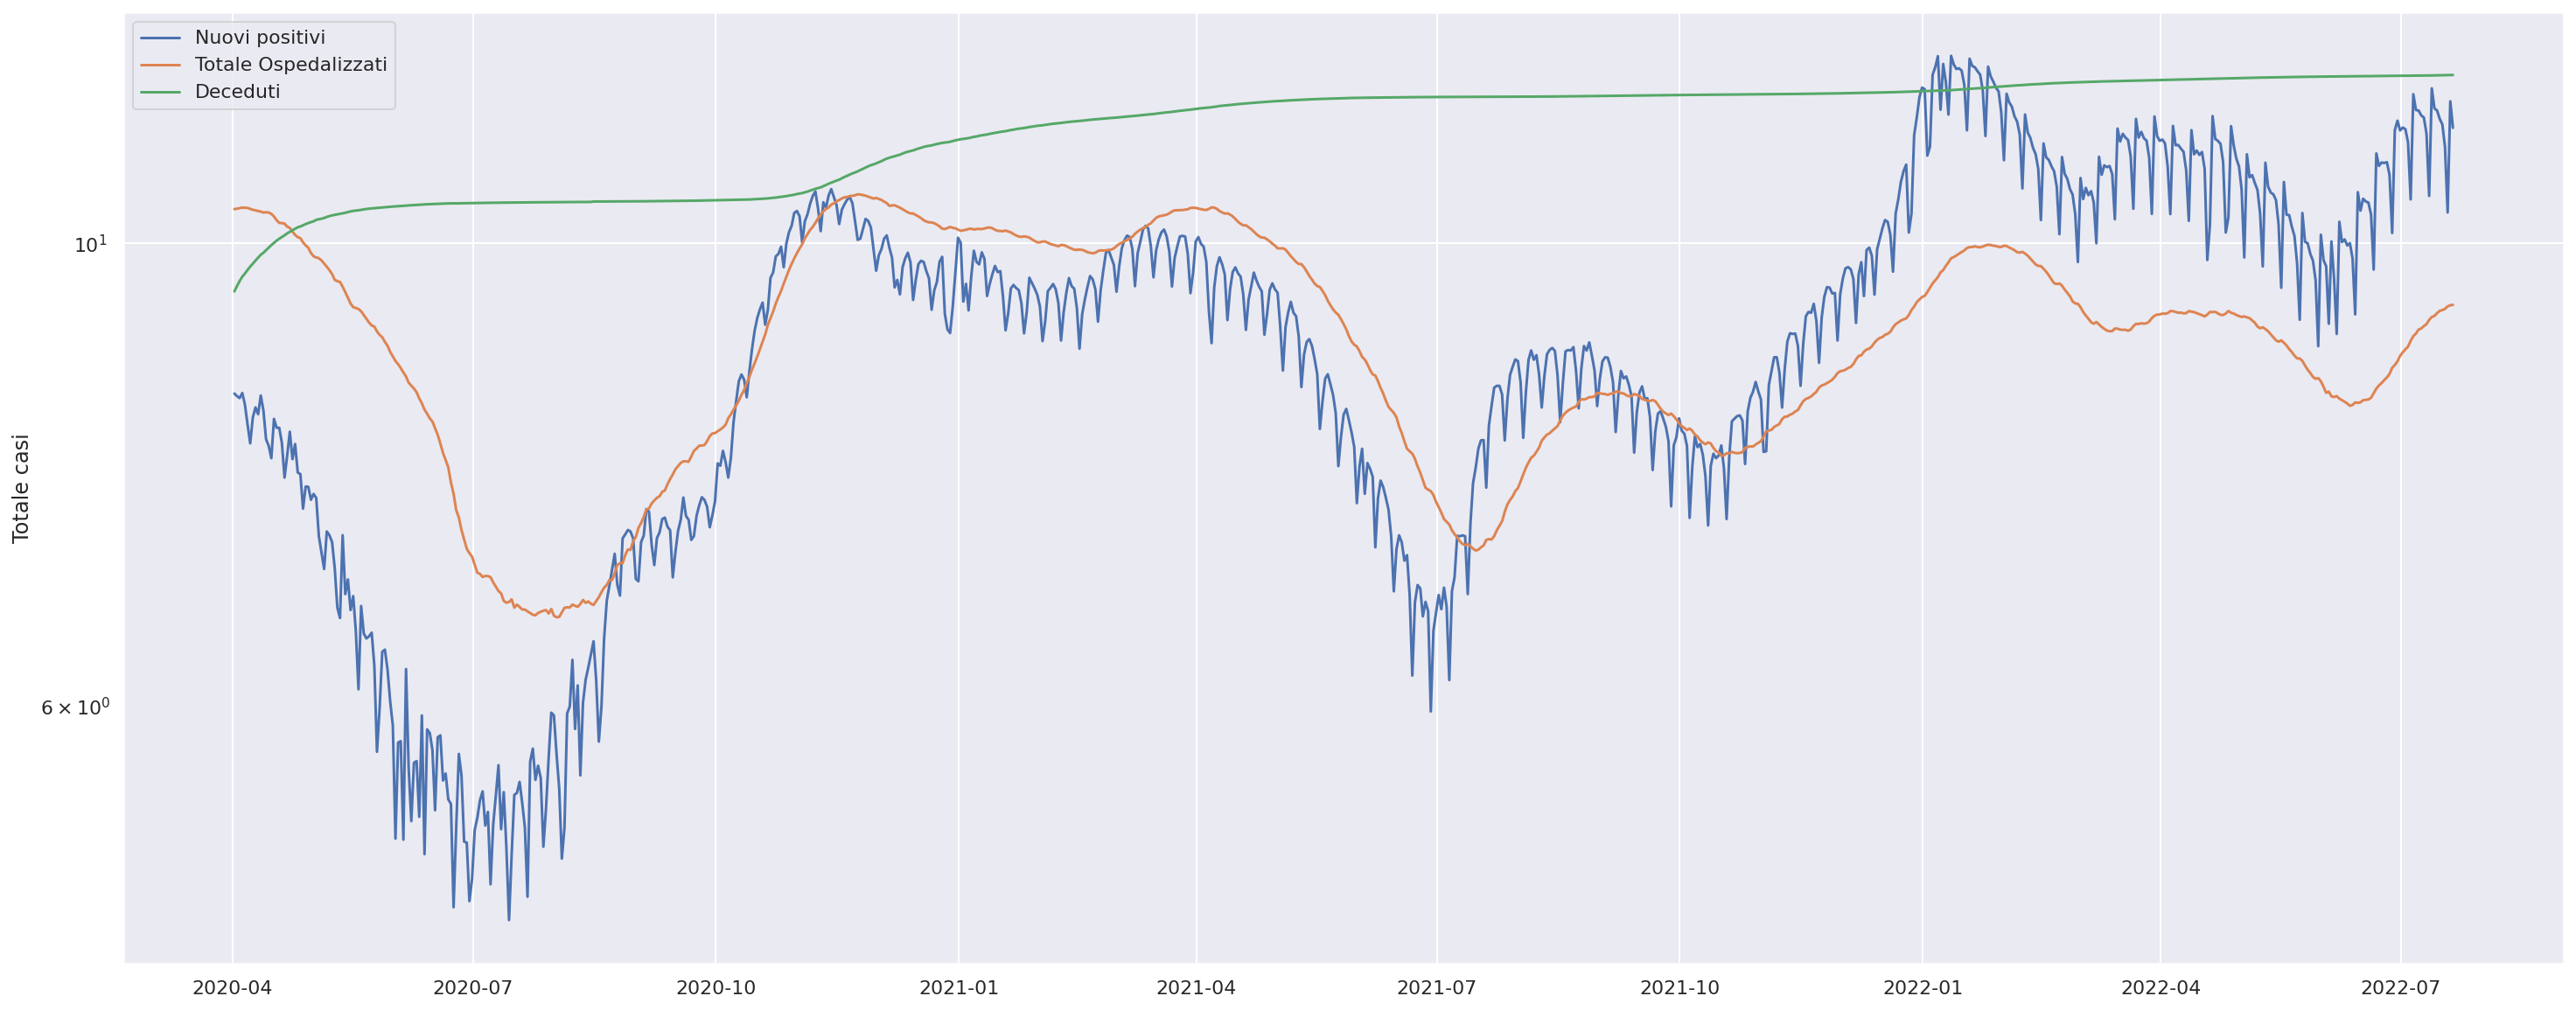

In [ ]:
logarithm = np.log(df['nuovi_positivi']['2020-04':'2022-07'])
plt.plot(logarithm,label='Nuovi positivi')

logospedalizzati = np.log(df['totale_ospedalizzati']['2020-04':'2022-07'])
plt.plot(logospedalizzati,label='Totale Ospedalizzati')

logdeceduti = np.log(df['deceduti']['2020-04':'2022-07'])
plt.plot(logdeceduti,label='Deceduti')

plt.yscale('log')      
plt.ylabel('Totale casi')
plt.legend();

In [ ]:


df_train = df.loc['2020':'2021']
df_test = df.loc['2022']

TypeError: unhashable type: 'numpy.ndarray'

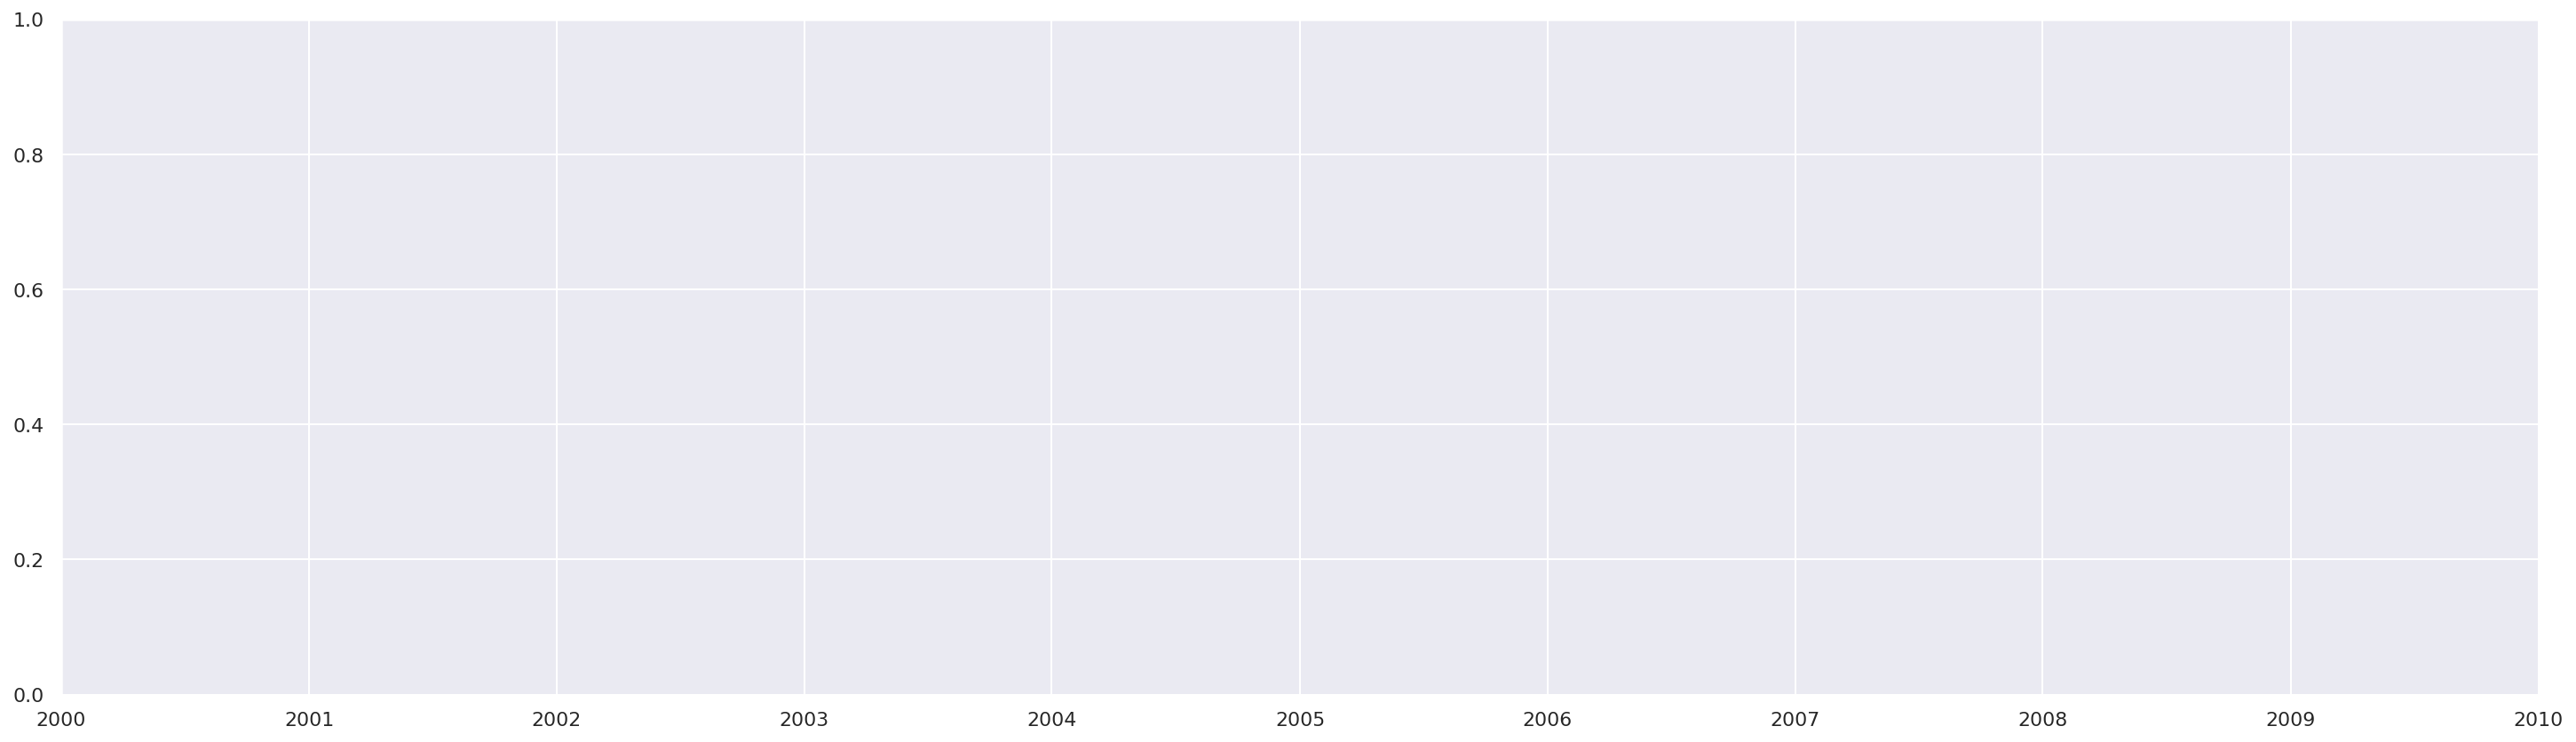

In [ ]:
plt.figure(figsize=(25, 7))

plt.plot(df_train,
         marker='.',
         markersize=4,
         linestyle='',
         label='train',
         color='blue')

plt.plot(df_test,
         marker='.',
         markersize=4,
         linestyle='',
         label='test',
         color='orange')

plt.title('Covid')
plt.legend();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51473f4b-c066-448b-9585-b1955fea67d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>